In [2]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [3]:
net_heat = ContTempNetwork.load('fig3_growing_network300')
net_heat_27_9 = ContTempNetwork.load('fig3_growing_network300_27-9')
net_heat_27 = ContTempNetwork.load('fig3_growing_network300_27')
net_heat_27_3 = ContTempNetwork.load('fig3_growing_network300_27-3')
net_heat_27_3anticipated = ContTempNetwork.load('fig3_growing_network300_27-3anticipated')

In [4]:
lamdas_growing = np.logspace(-4,0,200)

In [5]:
multi_res_heat = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_temporal_heat/clustersplot/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)

    multi_res_heat[lamda] = cluster
avg_nclusters_forw_heat_growing = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_heat_growing = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas_growing]


multi_res_heat = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-9_temporal_heat/clustersplot/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)

    multi_res_heat[lamda] = cluster
avg_nclusters_forw_heat_27_9 = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_heat_27_9 = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas_growing]

multi_res_heat = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27_temporal_heat/clustersplot/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)

    multi_res_heat[lamda] = cluster
avg_nclusters_forw_heat_27 = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_heat_27 = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas_growing]


multi_res_heat = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-3anticipated_temporal_heat/clustersplot/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)

    multi_res_heat[lamda] = cluster
avg_nclusters_forw_heat_27_3anticipated = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_heat_27_3anticipated = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas_growing]


multi_res_heat = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-3_temporal_heat/clustersplot/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)

    multi_res_heat[lamda] = cluster
avg_nclusters_forw_heat_27_3 = [np.mean([len(c) for c in \
                   multi_res_heat[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_heat_27_3 = [avg_norm_var_information(multi_res_heat[lamda]) for lamda in lamdas_growing]

In [6]:
def derivative(v1, v2):
    assert len(v1) == len(v2), "Error: in order to compute the numerical derivative, the two varibales need to have the same lenght."
    derivative = []
    for i, vi in enumerate(v1[1:]):
        m1 =(vi - v1[i-1])/(v2[i]-v2[i-1])
        m2 =(v1[i+1] - vi)/(v2[i+1]-v2[i])
        derivative.append((m1+m2)/2)
    return derivative

In [7]:
lamdas_vNS =  np.logspace(-3,1,200)


vNS_heat_end_growing = []
vNS_heat_end_27_9 = []
vNS_heat_end_27 = []
vNS_heat_end_27_3anticipated = []
vNS_heat_end_27_3 = []



for i, lamda in enumerate(lamdas_vNS):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_temporal_heat/vNS/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end_growing.append(S[list(S.keys())[0]][0])
        
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-9_temporal_heat/vNS/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end_27_9.append(S[list(S.keys())[0]][0])

    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27_temporal_heat/vNS/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end_27.append(S[list(S.keys())[0]][0])

    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-3anticipated_temporal_heat/vNS/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end_27_3anticipated.append(S[list(S.keys())[0]][0])

    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-3_temporal_heat/vNS/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)['vNS']
        vNS_heat_end_27_3.append(S[list(S.keys())[0]][0])

In [8]:
S1 = vNS_heat_end_growing
S2 = vNS_heat_end_27_9
S3 = vNS_heat_end_27
S4 = vNS_heat_end_27_3anticipated
S5 = vNS_heat_end_27_3

between_lamdas_vNS =  np.linspace(-3,1,200)

Q1 = derivative(vNS_heat_end_growing, between_lamdas_vNS)
Q2 = derivative(vNS_heat_end_27_9, between_lamdas_vNS)
Q3 = derivative(vNS_heat_end_27, between_lamdas_vNS)
Q4 = derivative(vNS_heat_end_27_3anticipated, between_lamdas_vNS)
Q5 = derivative(vNS_heat_end_27_3, between_lamdas_vNS)

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


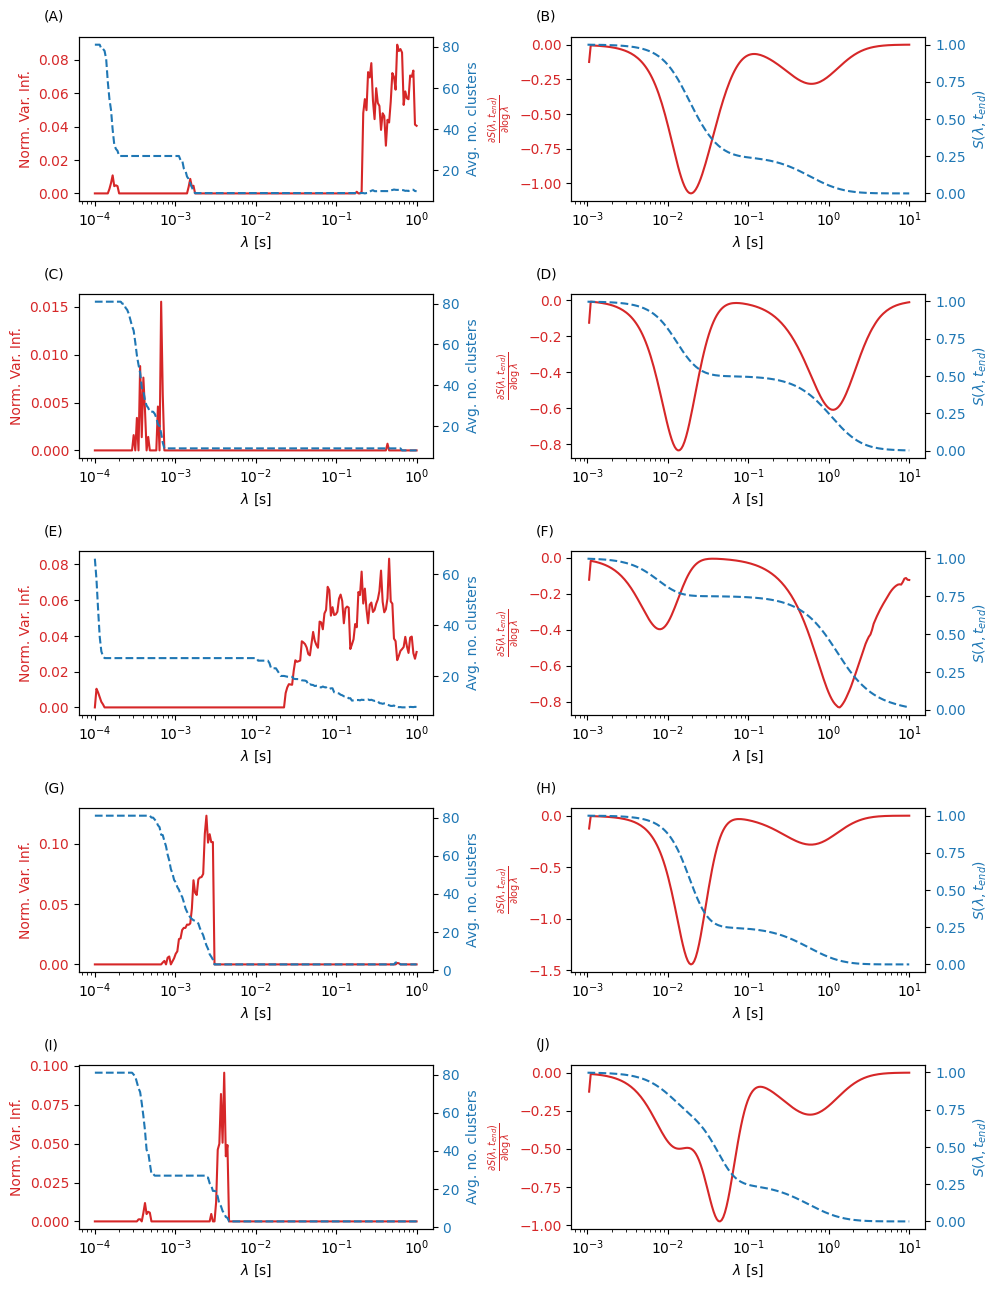

In [9]:
fig, axs = plt.subplots(5,2, sharex=False, figsize=(10, 13))

####### First Plot
color = 'tab:red'
axs[0,0].plot(lamdas_growing, NVI_forw_heat_growing, color=color, label='static norm NVI')

axs[0,0].set_xscale('log')
axs[0,0].set_xlabel(r'$\lambda$ [s]')
axs[0,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[0,0].tick_params(axis='y', labelcolor=color)
axs[0,0].text(-0.1,1.1, '(A)', transform=axs[0,0].transAxes)

ax1 = axs[0,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.plot(lamdas_growing, avg_nclusters_forw_heat_growing, '--', color=color, label='edge-centric')

ax1.set_xlabel(r'$\lambda$ [s]')
ax1.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)

####### Second Plot

color = 'tab:red'
axs[0,1].plot(lamdas_vNS[1:], Q1, color=color, label='dvNSdt')

axs[0,1].set_xscale('log')
axs[0,1].set_xlabel(r'$\lambda$ [s]')

axs[0,1].set_ylabel(r'$\frac{\partial S(\lambda, t_{end})}{\partial \log\lambda}$', color=color)
axs[0,1].tick_params(axis='y', labelcolor=color)
axs[0,1].text(-0.1,1.1, '(B)', transform=axs[0,1].transAxes)

ax2 = axs[0,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(lamdas_vNS, S1, '--', color=color, label='vNS')

ax2.set_ylabel(r'$S(\lambda, t_{end})$', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


####### Third Plot
color = 'tab:red'
axs[1,0].plot(lamdas_growing, NVI_forw_heat_27_9, color=color, label='static norm NVI')

axs[1,0].set_xscale('log')
axs[1,0].set_xlabel(r'$\lambda$ [s]')
axs[1,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[1,0].tick_params(axis='y', labelcolor=color)
axs[1,0].text(-0.1,1.1, '(C)', transform=axs[1,0].transAxes)

ax3 = axs[1,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax3.plot(lamdas_growing, avg_nclusters_forw_heat_27_9, '--', color=color, label='edge-centric')

ax3.set_xlabel(r'$\lambda$ [s]')
ax3.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=color)

####### Fourth Plot

color = 'tab:red'
axs[1,1].plot(lamdas_vNS[1:], Q2, color=color, label='dvNSdt')

axs[1,1].set_xscale('log')
axs[1,1].set_xlabel(r'$\lambda$ [s]')

axs[1,1].set_ylabel(r'$\frac{\partial S(\lambda, t_{end})}{\partial \log\lambda}$', color=color)
axs[1,1].tick_params(axis='y', labelcolor=color)
axs[1,1].text(-0.1,1.1, '(D)', transform=axs[1,1].transAxes)

ax4 = axs[1,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.plot(lamdas_vNS, S2, '--', color=color, label='vNS')

ax4.set_ylabel(r'$S(\lambda, t_{end})$', color=color)  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor=color)

####### Fifth Plot
color = 'tab:red'
axs[2,0].plot(lamdas_growing, NVI_forw_heat_27, color=color, label='static norm NVI')

axs[2,0].set_xscale('log')
axs[2,0].set_xlabel(r'$\lambda$ [s]')
axs[2,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[2,0].tick_params(axis='y', labelcolor=color)
axs[2,0].text(-0.1,1.1, '(E)', transform=axs[2,0].transAxes)

ax5 = axs[2,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax5.plot(lamdas_growing, avg_nclusters_forw_heat_27, '--', color=color, label='edge-centric')

ax5.set_xlabel(r'$\lambda$ [s]')
ax5.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax5.tick_params(axis='y', labelcolor=color)

####### Sixth Plot

color = 'tab:red'
axs[2,1].plot(lamdas_vNS[1:], Q3, color=color, label='dvNSdt')

axs[2,1].set_xscale('log')
axs[2,1].set_xlabel(r'$\lambda$ [s]')

axs[2,1].set_ylabel(r'$\frac{\partial S(\lambda, t_{end})}{\partial \log\lambda}$', color=color)
axs[2,1].tick_params(axis='y', labelcolor=color)
axs[2,1].text(-0.1,1.1, '(F)', transform=axs[2,1].transAxes)

ax6 = axs[2,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax6.plot(lamdas_vNS, S3, '--', color=color, label='vNS')

ax6.set_ylabel(r'$S(\lambda, t_{end})$', color=color)  # we already handled the x-label with ax1
ax6.tick_params(axis='y', labelcolor=color)

####### Seventh Plot
color = 'tab:red'
axs[3,0].plot(lamdas_growing, NVI_forw_heat_27_3anticipated, color=color, label='static norm NVI')

axs[3,0].set_xscale('log')
axs[3,0].set_xlabel(r'$\lambda$ [s]')
axs[3,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[3,0].tick_params(axis='y', labelcolor=color)
axs[3,0].text(-0.1,1.1, '(G)', transform=axs[3,0].transAxes)

ax7 = axs[3,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax7.plot(lamdas_growing, avg_nclusters_forw_heat_27_3anticipated, '--', color=color, label='edge-centric')

ax7.set_xlabel(r'$\lambda$ [s]')
ax7.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax7.tick_params(axis='y', labelcolor=color)

####### Eighth Plot

color = 'tab:red'
axs[3,1].plot(lamdas_vNS[1:], Q4, color=color, label='dvNSdt')

axs[3,1].set_xscale('log')
axs[3,1].set_xlabel(r'$\lambda$ [s]')

axs[3,1].set_ylabel(r'$\frac{\partial S(\lambda, t_{end})}{\partial \log\lambda}$', color=color)
axs[3,1].tick_params(axis='y', labelcolor=color)
axs[3,1].text(-0.1,1.1, '(H)', transform=axs[3,1].transAxes)

ax8 = axs[3,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax8.plot(lamdas_vNS, S4, '--', color=color, label='vNS')

ax8.set_ylabel(r'$S(\lambda, t_{end})$', color=color)  # we already handled the x-label with ax1
ax8.tick_params(axis='y', labelcolor=color)

####### Nineth Plot
color = 'tab:red'
axs[4,0].plot(lamdas_growing, NVI_forw_heat_27_3, color=color, label='static norm NVI')

axs[4,0].set_xscale('log')
axs[4,0].set_xlabel(r'$\lambda$ [s]')
axs[4,0].set_ylabel('Norm. Var. Inf.', color=color)
axs[4,0].tick_params(axis='y', labelcolor=color)
axs[4,0].text(-0.1,1.1, '(I)', transform=axs[4,0].transAxes)

ax9 = axs[4,0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax9.plot(lamdas_growing, avg_nclusters_forw_heat_27_3, '--', color=color, label='edge-centric')

ax9.set_xlabel(r'$\lambda$ [s]')
ax9.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax9.tick_params(axis='y', labelcolor=color)

####### Tenth Plot

color = 'tab:red'
axs[4,1].plot(lamdas_vNS[1:], Q5, color=color, label='dvNSdt')

axs[4,1].set_xscale('log')
axs[4,1].set_xlabel(r'$\lambda$ [s]')

axs[4,1].set_ylabel(r'$\frac{\partial S(\lambda, t_{end})}{\partial \log\lambda}$', color=color)
axs[4,1].tick_params(axis='y', labelcolor=color)
axs[4,1].text(-0.1,1.1, '(J)', transform=axs[4,1].transAxes)

ax10 = axs[4,1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax10.plot(lamdas_vNS, S5, '--', color=color, label='vNS')

ax10.set_ylabel(r'$S(\lambda, t_{end})$', color=color)  # we already handled the x-label with ax1
ax10.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [10]:
selected_lamdas = np.logspace(-3,1,10)
sample_times = list(np.arange(0, len(net_heat.times), 10))
sample_times_27_9 = list(np.arange(0, len(net_heat_27_9.times), 10))
sample_times_27 = list(np.arange(0, len(net_heat_27.times), 10))
sample_times_27_3anticipated = list(np.arange(0, len(net_heat_27_3anticipated.times), 10))
sample_times_27_3 = list(np.arange(0, len(net_heat_27_3.times), 10))

In [11]:
vNS_selected = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_temporal_heat/vNS_selected/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNS_selected.append(S['vNS'][f'{lamda:.11f}'])

vNS_selected_27_9= []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-9_temporal_heat/vNS_selected/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNS_selected_27_9.append(S['vNS'][f'{lamda:.11f}'])

vNS_selected_27= []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27_temporal_heat/vNS_selected/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNS_selected_27.append(S['vNS'][f'{lamda:.11f}'])

vNS_selected_27_3anticipated= []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-3anticipated_temporal_heat/vNS_selected/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNS_selected_27_3anticipated.append(S['vNS'][f'{lamda:.11f}'])

vNS_selected_27_3= []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_27-3_temporal_heat/vNS_selected/vNS{lamda:.11f}', 'rb') as f:
        S = pickle.load(f)
        vNS_selected_27_3.append(S['vNS'][f'{lamda:.11f}'])

In [19]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

for i, lamda in enumerate(selected_lamdas):
    plt.plot(net_heat.times[sample_times], vNS_selected[i], color = list_colors[i], label=r'$\lambda = 10^{%s} $')
    plt.plot(net_heat_27_9.times[sample_times_27_9], vNS_selected_27_9[i], ':', color = list_colors[i])
    plt.xlabel('t')
matplotx.line_labels()

fig.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/plots250/choice_selected_lamdas.eps', format='eps')
plt.show()

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/matplotx/_optimize.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  s[mask] = numpy.linalg.lstsq(AtA[mask][:, mask], Atb[mask], rcond=None)[0]


ValueError: 
\lambda = 10^{%s} 
              ^
ParseSyntaxException: Expected end_group, found '%'  (at char 14), (line:1, col:15)

<Figure size 640x480 with 1 Axes>

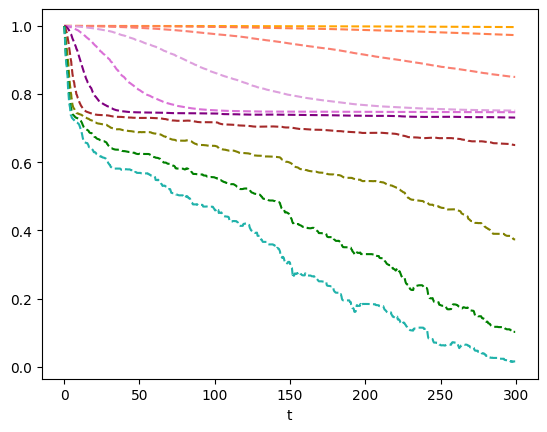

In [14]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

for i, lamda in enumerate(selected_lamdas):
    #plt.plot(net_heat.times[sample_times], vNS_selected[i], color = list_colors[i], label=r'$\lambda = 10^{%s} $' % exponent)
    plt.plot(net_heat_27.times[sample_times_27], vNS_selected_27[i], '--', color = list_colors[i])
    plt.xlabel('t')
matplotx.line_labels()

fig.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/plots250/choice_selected_lamdas.eps', format='eps')
plt.show()

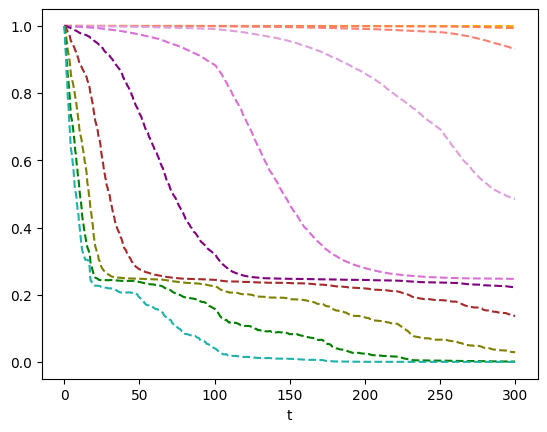

In [16]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

for i, lamda in enumerate(selected_lamdas):
   # plt.plot(net_heat.times[sample_times], vNS_selected[i], color = list_colors[i], label=r'$\lambda = 10^{%s} $' % exponent)
    plt.plot(net_heat_27_3anticipated.times[sample_times_27_3anticipated], vNS_selected_27_3anticipated[i], '--', color = list_colors[i])
    plt.xlabel('t')
matplotx.line_labels()

fig.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/plots250/choice_selected_lamdas.eps', format='eps')
plt.show()

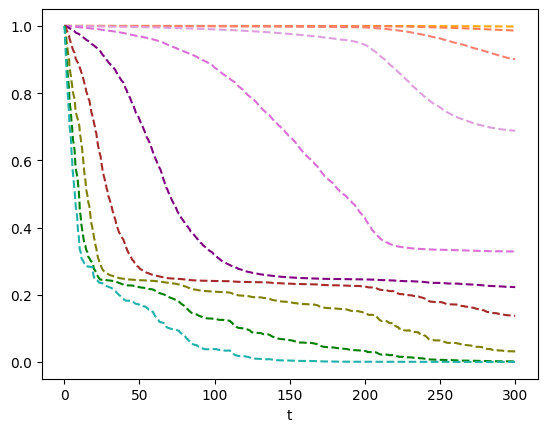

In [17]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

for i, lamda in enumerate(selected_lamdas):
    #plt.plot(net_heat.times[sample_times], vNS_selected[i], color = list_colors[i], label=r'$\lambda = 10^{%s} $' % exponent)
    plt.plot(net_heat_27_3.times[sample_times_27_3], vNS_selected_27_3[i], '--', color = list_colors[i])
    plt.xlabel('t')
matplotx.line_labels()

fig.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/plots250/choice_selected_lamdas.eps', format='eps')
plt.show()